In [1]:
include("../packages.jl")
include("../functions.jl")

build_kernel_NF (generic function with 1 method)

In [6]:
using FFTW
using ToeplitzMatrices

# Construction of A through DFT

In [15]:
Nspace = 100
N = Nspace
hatc = zeros(Nspace)

for k = 2:1:div(Nspace,2)
    hatc[k] = exp(-(k-2)/10)
    hatc[Nspace-k+2] = exp(-(k-2)/10)
end

c = real.(ifft(hatc))
scatter(c)
plot!(c)
p2=plot!([0;Nspace],[0;0],lc=:black,ls=:dash)
plot!(xlabel=L"k", grid=false, ylabel=L"c_k",legend=false,
    yguidefontrotation=-90,leftmargin=20px,xlims=(-10,110),ylims=(-0.05,0.25),dpi=300)

print("{")
for i = 1:1:Nspace
    print(c[i])
    if i != Nspace
        print(",")
    end 
end
print("}")

{0.20860161556022874,0.14874793530330327,0.0741802858854635,0.03808191265261546,0.019063951053688064,0.009681168178134053,0.003490183739321966,0.00014778040901350264,-0.002582458987659844,-0.004041104109191912,-0.005515834447334307,-0.006224510212422877,-0.0071427937844536086,-0.007499483229384183,-0.00813484181277377,-0.008306049046664512,-0.008782594835507031,-0.008847340361081658,-0.009227853935870875,-0.009227347821673169,-0.009546325795659082,-0.009503685572270435,-0.009781355959644277,-0.009710323246912587,-0.009959184072339812,-0.009868319798808147,-0.010096431369419807,-0.009991278637693954,-0.010204027931885969,-0.010088292184960653,-0.010289388799805963,-0.010165613111587486,-0.010357676617695826,-0.010227643946937147,-0.0104125634493087,-0.010277544584590324,-0.010456705978481654,-0.010317616851454953,-0.010492050419996242,-0.010349554325849759,-0.01052003280468034,-0.010374608055427727,-0.010541712963813225,-0.010393698176486808,-0.010557865219702126,-0.010407489660927758,-

[0.20860161556022874 0.14874793530330327 0.0741802858854635 0.03808191265261546 0.019063951053688064 0.009681168178134053 0.003490183739321966 0.00014778040901350264 -0.002582458987659844 -0.004041104109191912 -0.005515834447334307 -0.006224510212422877 -0.0071427937844536086 -0.007499483229384183 -0.00813484181277377 -0.008306049046664512 -0.008782594835507031 -0.008847340361081658 -0.009227853935870875 -0.009227347821673169 -0.009546325795659082 -0.009503685572270435 -0.009781355959644277 -0.009710323246912587 -0.009959184072339812 -0.009868319798808147 -0.010096431369419807 -0.009991278637693954 -0.010204027931885969 -0.010088292184960653 -0.010289388799805963 -0.010165613111587486 -0.010357676617695826 -0.010227643946937147 -0.0104125634493087 -0.010277544584590324 -0.010456705978481654 -0.010317616851454953 -0.010492050419996242 -0.010349554325849759 -0.01052003280468034 -0.010374608055427727 -0.010541712963813225 -0.010393698176486808 -0.010557865219702126 -0.010407489660927758 -

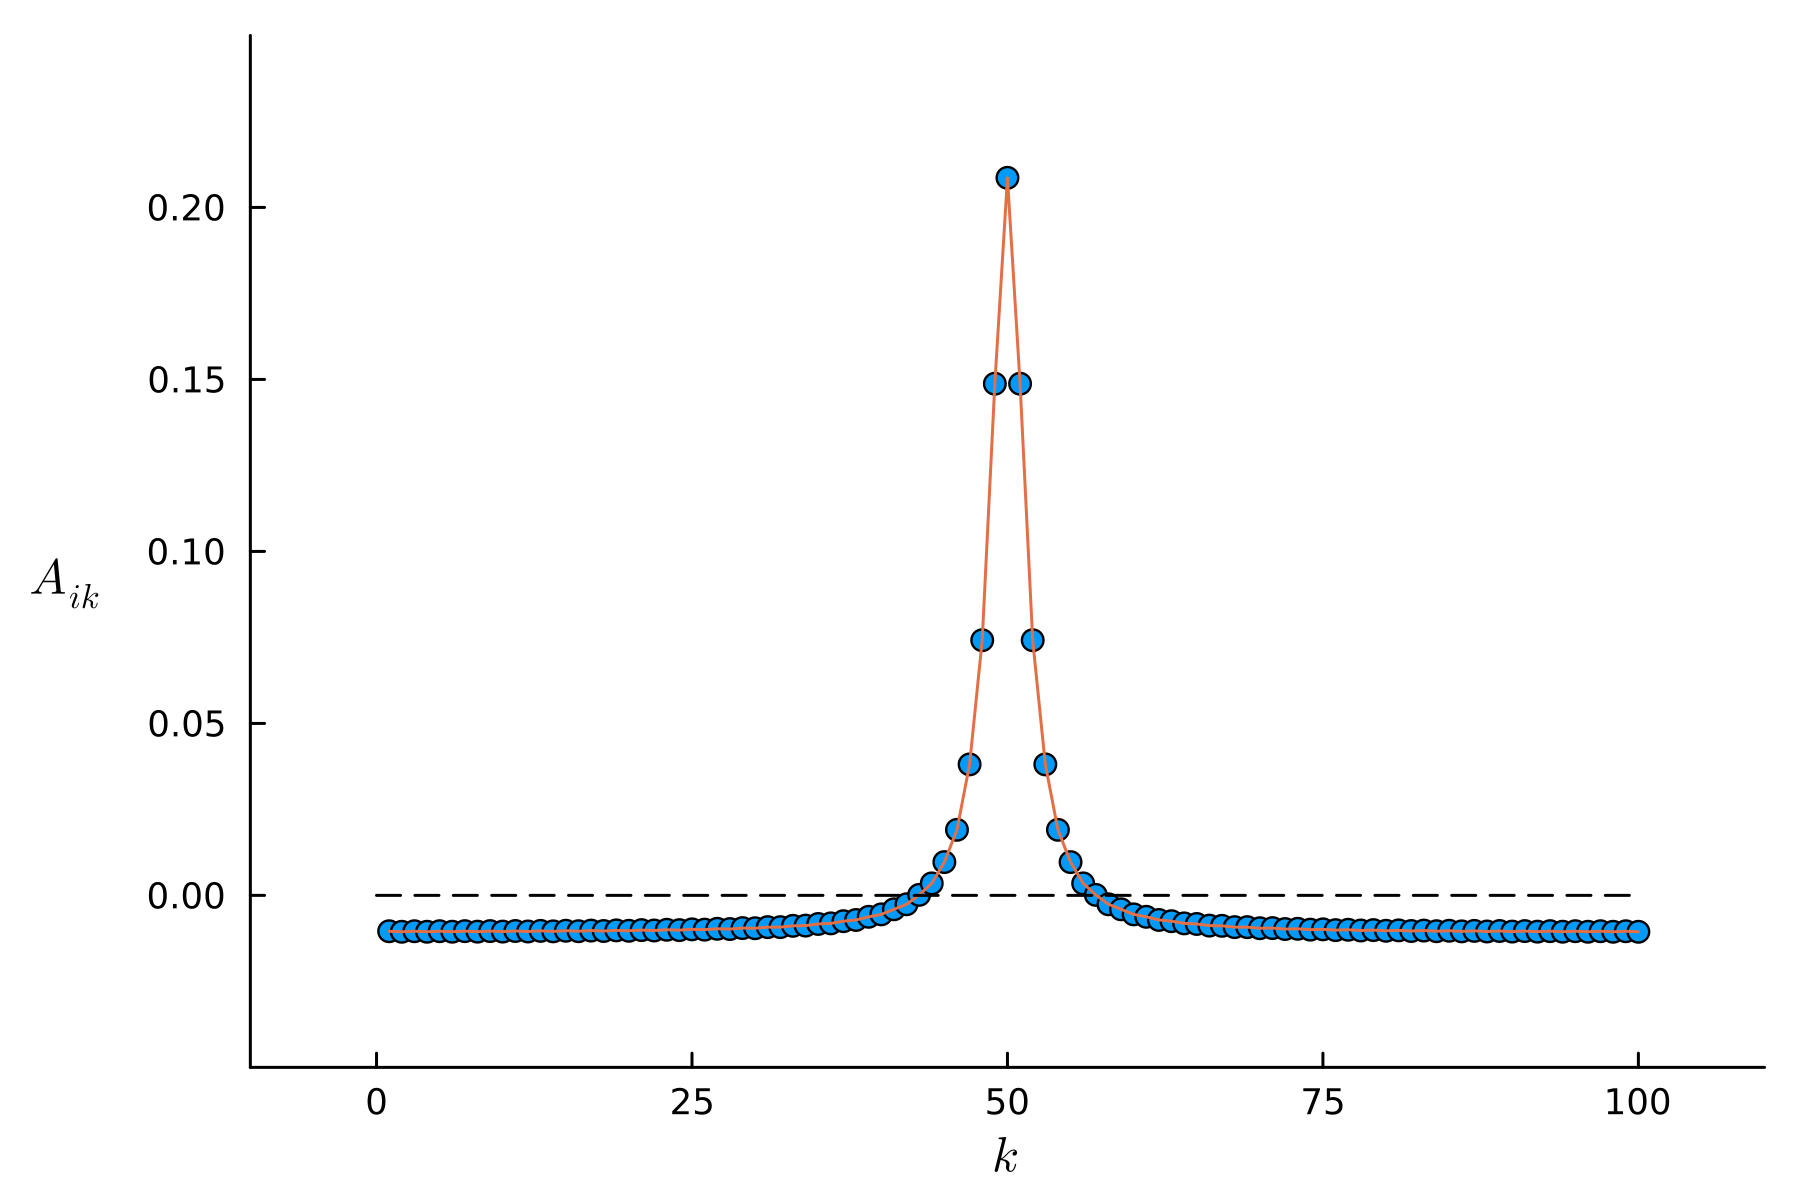

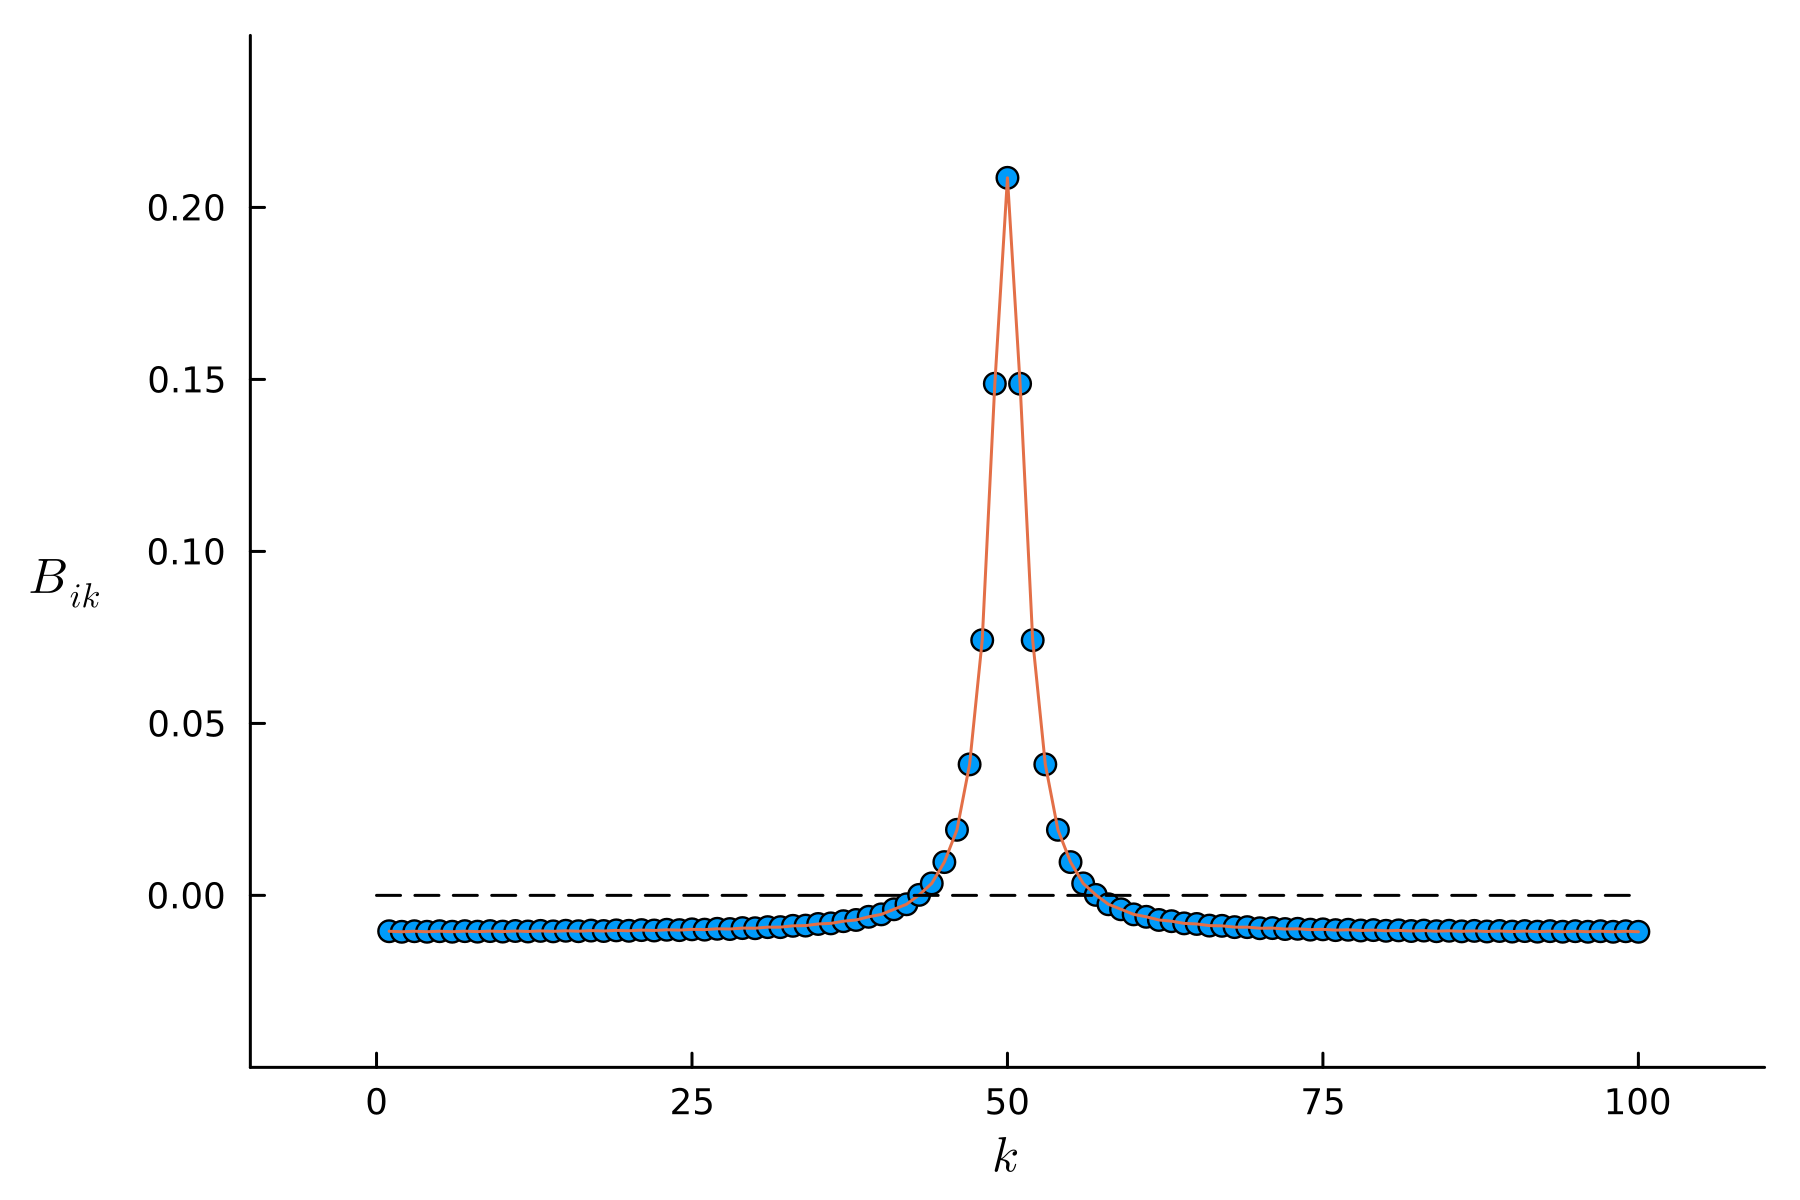

In [20]:
A=Matrix(Toeplitz(c,c))
B = Matrix{Float64}(undef, Nspace, Nspace)

for i = 1:1:Nspace
    for j = 1:1:Nspace
        B[i,j] = c[(j+i)%Nspace + 1]
    end
end
print(A)
p3=scatter(A[:,div(Nspace,2)])
plot!(A[:,div(Nspace,2)])
plot!([0;Nspace],[0;0],lc=:black,ls=:dash)
plot!(xlabel=L"k", grid=false, ylabel=L"A_{ik}",yguidefontrotation=-90,
    legend=false,leftmargin=25px,xlims=(-10,110),ylims=(-0.05,0.25),dpi=300)
    
display(p3)
p4=scatter(B[:,div(Nspace,2)])
plot!(B[:,div(Nspace,2)])
plot!([0;Nspace],[0;0],lc=:black,ls=:dash)
plot!(xlabel=L"k", grid=false, ylabel=L"B_{ik}",yguidefontrotation=-90,
    legend=false,leftmargin=25px,xlims=(-10,110),ylims=(-0.05,0.25),dpi=300)
display(p4)